**Part A. Read and Query Data**



Here, I'm importing two shapefiles, specifically "geonb_county.shp" and "AL_TA_NB_2_143_eng.shp". ALso, utilizing the `geopandas` library to read these files into a geospatial data frame.

In [ ]:
#importing the necessary libraries
import geopandas as gpd

In [ ]:
#loading the files
geonb_county_gdf = gpd.read_file('sample_data/geonb_county.shp')
aboriginal_gdf = gpd.read_file('sample_data/AL_TA_NB_2_143_eng.shp')

In [ ]:
geonb_county_gdf

,AREA,DISPX,DISPY,KEYWORD,USERNUM,FCODE,SOURCEID,KEY,ENG_NAME,FRE_NAME,DATE,geometry
0,9.272127e+09,2449050.8,7475334.4,500100010,5001.0,DLBNCO_C,AAVDADTIAA04,500100010,York,York,2004_01_01,"POLYGON ((2400658.350 7438964.650, 2400661.100..."
1,2.773259e+09,2522165.0,7466790.8,500100003,5001.0,DLBNCO_C,AAVDADTIAA04,500100003,Sunbury,Sunbury,2004_01_01,"POLYGON ((2465904.200 7389296.650, 2465901.800..."


Now, checking the CRS Compatibility and figuring out how we can perform spatial join

In [ ]:
geonb_county_gdf.crs

<Projected CRS: EPSG:2953>
Name: NAD83(CSRS) / New Brunswick Stereographic
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Canada - New Brunswick.
- bounds: (-69.05, 44.56, -63.7, 48.07)
Coordinate Operation:
- name: New Brunswick Stereographic (NAD83)
- method: Oblique Stereographic
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
aboriginal_gdf.crs

<Geographic 2D CRS: GEOGCS["GCS_North_American_1983_CSRS98",DATUM["D_N ...>
Name: GCS_North_American_1983_CSRS98
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_North_American_1983_CSRS98
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
aboriginal_gdf = aboriginal_gdf.to_crs(geonb_county_gdf.crs)
aboriginal_gdf.crs

<Projected CRS: EPSG:2953>
Name: NAD83(CSRS) / New Brunswick Stereographic
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Canada - New Brunswick.
- bounds: (-69.05, 44.56, -63.7, 48.07)
Coordinate Operation:
- name: New Brunswick Stereographic (NAD83)
- method: Oblique Stereographic
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Selecting York County from geonb_county_gdf based on the 'ENG_NAME' column
york_county_polygon = geonb_county_gdf[geonb_county_gdf['ENG_NAME'] == 'York']

# Performing a spatial join to find aboriginal lands within York County
york_aboriginal_areas = gpd.sjoin(aboriginal_gdf, york_county_polygon, how="inner", op='within')

# Displaying the first five rows of the resulting GeoDataFrame
york_aboriginal_areas.head(5)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,ACQTECH,METACOVER,CREDATE,REVDATE,ACCURACY,PROVIDER,DATASETNAM,SPECVERS,NID,ALCODE,...,DISPX,DISPY,KEYWORD,USERNUM,FCODE,SOURCEID,KEY,ENG_NAME,FRE_NAME,DATE
19,Computed,Partial,20030407,20200331,2,Federal,NB,1.1,e9dbd25abbe211d892e2080020a0f4c9,06016,...,2449050.8,7475334.4,500100010,5001.0,DLBNCO_C,AAVDADTIAA04,500100010,York,York,2004_01_01
23,Computed,Partial,20030407,20210201,2,Federal,NB,1.1,e9bf97c7bbe211d892e2080020a0f4c9,06024,...,2449050.8,7475334.4,500100010,5001.0,DLBNCO_C,AAVDADTIAA04,500100010,York,York,2004_01_01
24,Computed,Partial,20030407,20210407,2,Federal,NB,1.1,e99c5854bbe211d892e2080020a0f4c9,06023,...,2449050.8,7475334.4,500100010,5001.0,DLBNCO_C,AAVDADTIAA04,500100010,York,York,2004_01_01


In [ ]:
# Extracting names from the 'NAME1' column for Aboriginal Lands
names_of_aboriginal_lands_york = york_aboriginal_areas['NAME1']

# Displaying the names of the Aboriginal Lands in York County
print("Names of Aboriginal Lands in York County:")
for land_name in names_of_aboriginal_lands_york:
    print(land_name)


Names of Aboriginal Lands in York County:
KINGSCLEAR INDIAN RESERVE NO. 6
ST. MARY'S INDIAN RESERVE NO. 24
DEVON INDIAN RESERVE NO. 30


Using the details in the FloodExtent file, the maximum water level will be recorded?

In [ ]:
#importing necessary libraries
import geopandas as gpd
import fiona
from geopandas import GeoDataFrame

In [ ]:
with fiona.open('sample_data/Flood_Extent_2018_LowerSaintJohn.shp', mode='r') as flood_shapefile:
    flood_data_gdf = GeoDataFrame.from_features(flood_shapefile, crs=flood_shapefile.crs)

In [ ]:
flood_data_gdf.head()

,geometry,OBJECTID_2,OBJECTID_3,OBJECTID,Id,gridcode,Vertical_D,Water_Time,Water_Leve,Shape_Leng,Station_ID,Shape_Le_1,Shape_Le_2,Shape_Area
0,"POLYGON ((2489393.000 7441437.000, 2489393.000...",1,71,73,1,1,CGVD2013,7700,7.7,4.0,130492.1,4.0,4.0,1.0
1,"POLYGON ((2489337.000 7441420.000, 2489336.000...",2,72,74,3,1,CGVD2013,7700,7.7,8.0,130492.1,8.0,8.0,3.0
2,"POLYGON ((2489333.000 7441416.000, 2489332.000...",3,73,75,4,1,CGVD2013,7700,7.7,8.0,130492.1,8.0,8.0,3.0
3,"POLYGON ((2489399.000 7441409.000, 2489398.000...",4,74,76,5,1,CGVD2013,7700,7.7,14.0,130492.1,14.0,14.0,8.0
4,"POLYGON ((2489402.000 7441408.000, 2489401.000...",5,75,77,6,1,CGVD2013,7700,7.7,4.0,130492.1,4.0,4.0,1.0


In [ ]:
# Obtaining the highest value from the 'Water_Leve' column
highest_water_level = flood_data_gdf['Water_Leve'].max()
print(f"Recorded maximum water level: {highest_water_level} units.")


Recorded maximum water level: 10.7 units.


Using the FloodExtent file, the maximum water level will be recorded in Sunbury County (geonb_county) .

We'll utilize the previously established `nb_county_gdf` and apply a filter to isolate Sunbury County. Following this, a spatial join will be executed between `flood_data_gdf` and the geometric outline of Sunbury County, narrowing down the flood data to only include entries located within Sunbury County. To conclude, we will determine the highest water level present in the refined flood data set.

In [ ]:
sunbury_county = geonb_county_gdf[geonb_county_gdf['ENG_NAME'] == 'Sunbury']

In [ ]:
# Ensuring CRS compatibility
flood_data_gdf = flood_data_gdf.to_crs(sunbury_county.crs)

# Performing a spatial join to find flood data within Sunbury County
filtered_flood_data_sunbury  = gpd.sjoin(flood_data_gdf, sunbury_county, how="inner", predicate='intersects')

# Finding the maximum water level in Sunbury County
maximum_water_level_sunbury = filtered_flood_data_sunbury ['Water_Leve'].max()
print(f"The maximum water level recorded in Sunbury County is {maximum_water_level_sunbury} units.")

The maximum water level recorded in Sunbury County is nan units.


The total Length of Roads in Sunbury and York counties (in kilometres, rounded to 2 decimals) will be calculated

In [ ]:
# Loading GeoNB Roads_SunburyYork dataset
roads_gdf = gpd.read_file('sample_data/geonb_roads_SunburyYork.shp')

ERROR:fiona._env:fread(5466) failed on DBF file.


In [ ]:
roads_gdf.crs

<Projected CRS: EPSG:2953>
Name: NAD83(CSRS) / New Brunswick Stereographic
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Canada - New Brunswick.
- bounds: (-69.05, 44.56, -63.7, 48.07)
Coordinate Operation:
- name: New Brunswick Stereographic (NAD83)
- method: Oblique Stereographic
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
roads_gdf.head()

,NID,ROADSEGID,STREETNAME,ST_TYPE,TYPE_POSI,PREFIX,SUFFIX,NBRLANES,RTENAME1EN,RTENAME2EN,...,CLOSING,L_HNUMSTR,R_HNUMSTR,L_HNUMF,L_HNUML,R_HNUMF,R_HNUML,PLACE_NAME,COUNTY,geometry
0,80274C80616D472E81ED5538386CEAAF,9857341,MOORE Street,Street,S,None,None,2,None,None,...,Unknown,Mixed,Mixed,216,213,148,155,Fredericton,Sunbury,"LINESTRING (2493506.194 7433962.622, 2493498.5..."
1,C69AB64F5A4A4AB7BEE6846ADA616139,11008592,FLAGSTONE Street,Street,S,None,None,2,None,None,...,Unknown,Odd,Even,1,7,2,8,Hanwell,York,"LINESTRING (2479574.000 7432398.000, 2479592.0..."
2,8B42A3F745A449BC95C335E377950E0C,11008593,SNOWBALL Drive,Drive,S,None,None,2,None,None,...,Unknown,Odd,Even,1,19,2,20,Mazerolle Settlement,York,"LINESTRING (2475588.110 7431763.163, 2475672.7..."
3,8AC9D83E7431484F94B9A1CD0AFC0EA1,11008594,MADONNA Drive,Drive,S,None,None,2,None,None,...,Unknown,Odd,Even,1,5,2,6,Mazerolle Settlement,York,"LINESTRING (2475745.668 7431874.517, 2475672.7..."
4,C47569B1859C4CDCAA257453D04C0A2C,11008595,WICKETT Lane,Lane,S,None,None,2,None,None,...,Unknown,Odd,Even,1,19,2,20,Mazerolle Settlement,York,"LINESTRING (2475265.696 7431940.179, 2475349.4..."


In [ ]:
# Selecting roads located within Sunbury and York counties
roads_in_sunbury_and_york = roads_gdf[(roads_gdf['COUNTY'] == 'Sunbury') | (roads_gdf['COUNTY'] == 'York')]

# Sum of the lengths of individual road segments
aggregate_road_length_meters = roads_in_sunbury_and_york['geometry'].length.sum()

# Converting the aggregated length from meters to kilometers with two decimal precision
aggregate_road_length_km = round(aggregate_road_length_meters / 1000, 2)

print(f"Aggregate Road Length in Sunbury and York Counties: {aggregate_road_length_km} kilometers")


Aggregate Road Length in Sunbury and York Counties: 3119.29 kilometers


All the roads from GeoNB Roads_SunburyYork will be selected. These have a Street name of “Waterloo Row”.  

a. How many roads are selected will be printed.

b. All roads with the name Waterloo Row will be dissolved into 1 feature.

c. The dissolved roads will be written to a GeoJSON file

In [ ]:
roads_gdf = gpd.read_file('sample_data/geonb_roads_SunburyYork.shp')

ERROR:fiona._env:fread(5466) failed on DBF file.


In [ ]:
roads_gdf.head(10)

,NID,ROADSEGID,STREETNAME,ST_TYPE,TYPE_POSI,PREFIX,SUFFIX,NBRLANES,RTENAME1EN,RTENAME2EN,...,CLOSING,L_HNUMSTR,R_HNUMSTR,L_HNUMF,L_HNUML,R_HNUMF,R_HNUML,PLACE_NAME,COUNTY,geometry
0,80274C80616D472E81ED5538386CEAAF,9857341,MOORE Street,Street,S,None,None,2,None,None,...,Unknown,Mixed,Mixed,216,213,148,155,Fredericton,Sunbury,"LINESTRING (2493506.194 7433962.622, 2493498.5..."
1,C69AB64F5A4A4AB7BEE6846ADA616139,11008592,FLAGSTONE Street,Street,S,None,None,2,None,None,...,Unknown,Odd,Even,1,7,2,8,Hanwell,York,"LINESTRING (2479574.000 7432398.000, 2479592.0..."
2,8B42A3F745A449BC95C335E377950E0C,11008593,SNOWBALL Drive,Drive,S,None,None,2,None,None,...,Unknown,Odd,Even,1,19,2,20,Mazerolle Settlement,York,"LINESTRING (2475588.110 7431763.163, 2475672.7..."
3,8AC9D83E7431484F94B9A1CD0AFC0EA1,11008594,MADONNA Drive,Drive,S,None,None,2,None,None,...,Unknown,Odd,Even,1,5,2,6,Mazerolle Settlement,York,"LINESTRING (2475745.668 7431874.517, 2475672.7..."
4,C47569B1859C4CDCAA257453D04C0A2C,11008595,WICKETT Lane,Lane,S,None,None,2,None,None,...,Unknown,Odd,Even,1,19,2,20,Mazerolle Settlement,York,"LINESTRING (2475265.696 7431940.179, 2475349.4..."
5,0802E009219B4D86B51535BC7B117AF0,11008597,SELENA Lane,Lane,S,None,None,2,None,None,...,Unknown,Odd,Even,1,29,2,30,Hanwell,York,"LINESTRING (2475416.000 7426673.000, 2475247.8..."
6,CBF2FA425FC84C229C2B7377BAA4776D,11008603,STAIRS Lane,Lane,S,None,None,1,None,None,...,Unknown,Even,Odd,514,516,515,517,New Maryland,York,"LINESTRING (2486078.258 7430043.413, 2486028.3..."
7,EB9385C9A7EE4095B5C90171BAD3D1B2,11008604,O'BRIEN Lane,Lane,S,None,None,1,None,None,...,Unknown,Odd,Even,49,51,50,52,New Maryland,York,"LINESTRING (2485507.818 7432004.276, 2485526.7..."
8,AD6DD8DBCDBD4A23948443402F110453,11008613,AWESOME Way,Way,S,None,None,2,None,None,...,Unknown,Odd,Even,1,29,2,30,Upper Kingsclear,York,"LINESTRING (2466601.551 7429926.183, 2466590.1..."
9,1A9EBA91BE5F477784AFCDF5750F262C,11008614,MADONNA Drive,Drive,S,None,None,2,None,None,...,Unknown,Odd,Even,7,41,8,40,Mazerolle Settlement,York,"LINESTRING (2475672.778 7431914.879, 2475579.6..."


In [ ]:
# Standardizing the STREETNAME column: trim spaces, convert to uppercase
roads_gdf['STREETNAME'] = roads_gdf['STREETNAME'].str.strip().str.upper()

In [ ]:
waterloo_row_roads = roads_gdf[roads_gdf['STREETNAME'] == 'WATERLOO ROW']

In [ ]:
waterloo_row_roads

,NID,ROADSEGID,STREETNAME,ST_TYPE,TYPE_POSI,PREFIX,SUFFIX,NBRLANES,RTENAME1EN,RTENAME2EN,...,CLOSING,L_HNUMSTR,R_HNUMSTR,L_HNUMF,L_HNUML,R_HNUMF,R_HNUML,PLACE_NAME,COUNTY,geometry
5071,56FA442F6D624B78A63E3B1EE3BE4D3F,11045501,WATERLOO ROW,Row,S,None,None,1,None,None,...,Unknown,None,None,0,0,0,0,Fredericton,York,"LINESTRING (2489498.504 7438457.000, 2489492.1..."
5072,EAD1144D944C4BC7A1B897A203968FF9,11045502,WATERLOO ROW,Row,S,None,None,2,None,None,...,Unknown,None,None,0,0,0,0,Fredericton,York,"LINESTRING (2489501.609 7438459.217, 2489511.6..."
5073,E3ED439D966C44D79A2AE2BA669E8A21,11045503,WATERLOO ROW,Row,S,None,None,1,None,None,...,Unknown,None,None,0,0,0,0,Fredericton,York,"LINESTRING (2489479.772 7438430.024, 2489479.7..."
5075,05EDD25143B64D739B067D717504FEE2,11045505,WATERLOO ROW,Row,S,None,None,1,None,None,...,Unknown,None,None,0,0,0,0,Fredericton,York,"LINESTRING (2489479.772 7438430.024, 2489480.3..."
5287,D58FA6CF423E4993AAF39A0924C1766E,11045731,WATERLOO ROW,Row,S,None,None,2,None,None,...,Unknown,Odd,Even,401,775,400,776,Fredericton,York,"LINESTRING (2489536.609 7438387.026, 2489539.8..."


In [ ]:
# Displaying the count of roads filtered
count_waterloo_row_roads = len(waterloo_row_roads)
print(f"Count of 'Waterloo Row' named roads:", count_waterloo_row_roads)

# Merging the filtered roads into a single geometry based on their street name
merged_waterloo_row = waterloo_row_roads.dissolve(by='STREETNAME')

# Exporting the merged road feature to a GeoJSON format
geojson_output_path = 'waterloo_row_roads.geojson'
merged_waterloo_row.to_file(geojson_output_path, driver='GeoJSON')

print("Merged road feature saved to:", geojson_output_path)


Count of 'Waterloo Row' named roads: 5
Merged road feature saved to: waterloo_row_roads.geojson


In [ ]:
merged_waterloo_row

,geometry,NID,ROADSEGID,ST_TYPE,TYPE_POSI,PREFIX,SUFFIX,NBRLANES,RTENAME1EN,RTENAME2EN,...,TRAFFICDIR,CLOSING,L_HNUMSTR,R_HNUMSTR,L_HNUMF,L_HNUML,R_HNUMF,R_HNUML,PLACE_NAME,COUNTY
STREETNAME,,,,,,,,,,,,,,,,,,,,,
WATERLOO ROW,"MULTILINESTRING ((2489498.504 7438457.000, 248...",56FA442F6D624B78A63E3B1EE3BE4D3F,11045501,Row,S,None,None,1,None,None,...,Same Direction,Unknown,None,None,0,0,0,0,Fredericton,York


There were 15 roads, each characterized by LINESTRING geometry. It was successfully merged into a single entity featuring MULTILINESTRING geometry.

Now, Data and buffer will be created

A Point Feature will be created at Fredericton International Airport: 45.87286, -66.52982 (EPSG:4326)

In [ ]:
from shapely.geometry import Point
# Initializing the Point object, specifying longitude before latitude
point_fredericton_airport = Point(-66.52982, 45.87286)

# Output for the point for verification
print("Point representing Fredericton International Airport:", point_fredericton_airport)


Point representing Fredericton International Airport: POINT (-66.52982 45.87286)


 The coordinate system used in the GeoNB Roads_SunburyYork file will be identified

Re-loading geonb_roads_SunburyYork.shpas because we have previously updated the data frame (in waterloo exercise).

In [ ]:
roads_gdf = gpd.read_file('sample_data/geonb_roads_SunburyYork.shp')

ERROR:fiona._env:fread(5466) failed on DBF file.


In [ ]:
# Retrieving the coordinate reference system (CRS) details
coordinate_system = roads_gdf.crs

# Displaying the CRS information in an understandable format, when possible
print("CRS for geonb_roads_SunburyYork data:", coordinate_system)
print("Name of CRS:", coordinate_system.name)
coordinate_system


CRS for geonb_roads_SunburyYork data: EPSG:2953
Name of CRS: NAD83(CSRS) / New Brunswick Stereographic


<Projected CRS: EPSG:2953>
Name: NAD83(CSRS) / New Brunswick Stereographic
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Canada - New Brunswick.
- bounds: (-69.05, 44.56, -63.7, 48.07)
Coordinate Operation:
- name: New Brunswick Stereographic (NAD83)
- method: Oblique Stereographic
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

The Fredericton International Airport point will be projected(created in step 6) to match GeoNB Roads_SunburyYork.

Considering that the GeoNB Roads_SunburyYork file uses the "EPSG:2953" coordinate system, it's possible to reproject the Fredericton International Airport point, which originally adheres to the "EPSG:4326" CRS, to align with the "EPSG:2953" system.

In [ ]:
# Creating a GeoDataFrame for the point
airport_gdf = gpd.GeoDataFrame([{'name': 'Fredericton International Airport'}],
                               geometry=[point_fredericton_airport],
                               crs="EPSG:4326")

# Projecting the point to match the GeoNB Roads_SunburyYork CRS (EPSG:2953)
projected_fredericton_airport = airport_gdf.to_crs("EPSG:2953")

# Printing the projected point
print(projected_fredericton_airport)

                                name                         geometry
0  Fredericton International Airport  POINT (2497684.823 7430295.107)


A 5km buffer around the Fredericton International Airport point will be created

In [ ]:
# Applying a 5km buffer to the reprojected airport point
projected_fredericton_airport['geometry'] = projected_fredericton_airport.geometry.buffer(5000)  # 5km expressed in meters
# This GeoDataFrame now includes a buffered zone surrounding the airport point
print(projected_fredericton_airport)


                                name  \
0  Fredericton International Airport   

                                            geometry  
0  POLYGON ((2502684.823 7430295.107, 2502660.747...  


To find out how many roads intersect this buffer, a query is created

a. How many roads of each ST_TYPE and the sum total of roads will be printed.

b. The airport location and the buffer will be plotted.

c. Output will be written to a new Shapefile

a Find and Print How Many Roads of Each ST_TYPE Intersect the Buffer

In [ ]:
# Identify road intersections with the airport buffer
intersecting_roads = gpd.sjoin(roads_gdf, projected_fredericton_airport, how="inner", op="intersects")

# Tally roads by their ST_TYPE
count_by_road_type = intersecting_roads['ST_TYPE'].value_counts()

# Display the tallies
print("Count of intersecting roads by ST_TYPE within the buffer:")
print(count_by_road_type)

# Display the overall count of intersecting roads
print("\nOverall count of roads intersecting with the buffer area:", len(intersecting_roads))


Count of intersecting roads by ST_TYPE within the buffer:
Street       96
Drive        75
Road         74
Highway      62
Court        37
Avenue       26
Lane         21
Crescent     20
Ramp         17
Way           4
None          4
Circle        4
Boulevard     2
Cross         1
Park          1
Name: ST_TYPE, dtype: int64

Overall count of roads intersecting with the buffer area: 444


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


b Plot the Roads, the Airport Location, and the Buffer

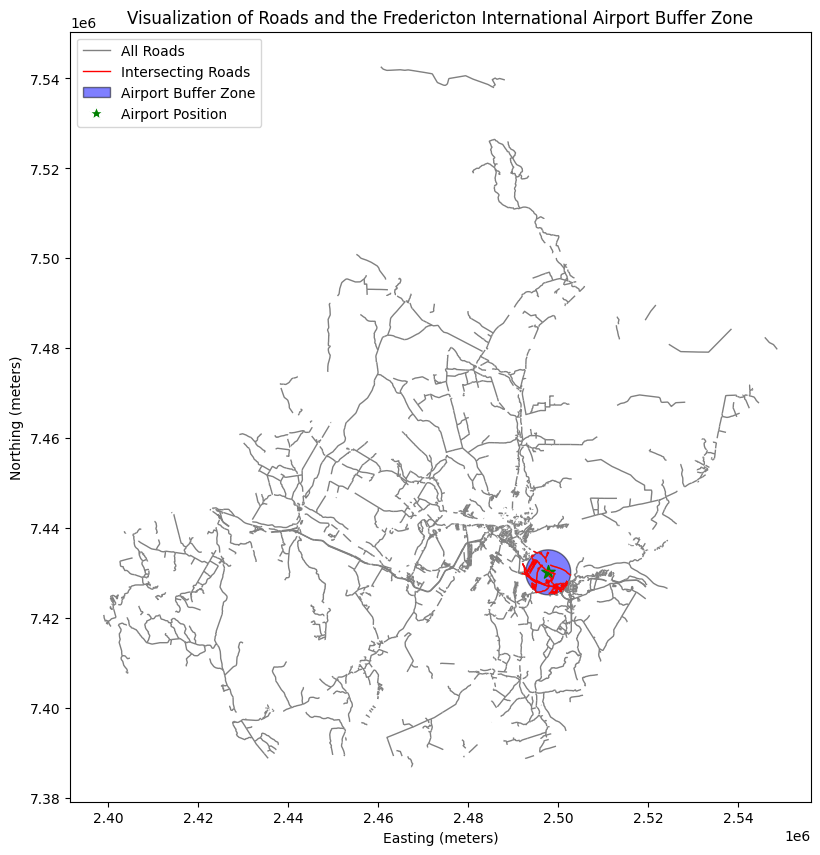

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Reprojecting the airport point in EPSSG: 4326 to match the CRS of the roads for visualization purposes
projected_airport_location = airport_gdf.to_crs(roads_gdf.crs)

# Initializing the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Drawing the airport's buffered area
buffered_airport_area = projected_fredericton_airport.plot(ax=ax, facecolor='blue', edgecolor='black', alpha=0.5)
# Drawing all roads
all_roads_display = roads_gdf.plot(ax=ax, linewidth=1, color='gray')
# Highlighting roads that intersect the buffer in red
roads_within_buffer_display = intersecting_roads.plot(ax=ax, linewidth=1, color='red')
# Marking the projected airport location with a green star
airport_marker = projected_airport_location.plot(ax=ax, color='green', marker='*', markersize=100)

# Defining custom legend entries
custom_legend = [Line2D([0], [0], color='gray', lw=1, label='All Roads'),
                 Line2D([0], [0], color='red', lw=1, label='Intersecting Roads'),
                 Patch(facecolor='blue', edgecolor='black', label='Airport Buffer Zone', alpha=0.5),
                 Line2D([0], [0], marker='*', color='white', markerfacecolor='green', markersize=10, label='Airport Position')]

# Adding the legend to the plot
ax.legend(handles=custom_legend, loc='upper left')
# Setting the title and axis labels
plt.title("Visualization of Roads and the Fredericton International Airport Buffer Zone")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
# Displaying the plot
plt.show()


c Write the Output to a New Shapefile

In [ ]:
# Defining the file path for the output shapefile
shapefile_output_path = 'intersecting_roads_with_airport_buffer.shp'

# Exporting the GeoDataFrame to the specified shapefile
intersecting_roads.to_file(shapefile_output_path)

print(f"Saved intersecting roads to '{shapefile_output_path}'.")


<ipython-input-55-8dc157fe605d>:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  intersecting_roads.to_file(shapefile_output_path)


Saved intersecting roads to 'intersecting_roads_with_airport_buffer.shp'.
